In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix,
                           accuracy_score,
                            precision_score,
                             recall_score)

In [2]:
data = pd.read_csv(r"breast-cancer.csv")


### We check for missing value

In [3]:
data.isna().sum().sum()

0

 ### Change diagnosis from string to numerical

In [4]:
data['diagnosis'] = data['diagnosis'].replace(['M', 'B'], [1,0])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Shuffle index

In [5]:
data = data.sample(frac = 1)
data = data.reset_index(drop=True) # We need so the regression can work
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84799002,1,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,...,17.460,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
1,864033,0,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,...,11.050,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
2,925622,1,15.220,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090
3,8712291,0,14.970,19.76,95.50,690.2,0.08421,0.05352,0.019470,0.019390,...,15.980,25.82,102.30,782.1,0.10450,0.09995,0.07750,0.05754,0.2646,0.06085
4,8612080,0,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,...,13.670,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,88249602,0,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617
565,859464,0,9.465,21.01,60.11,269.4,0.10440,0.07773,0.021720,0.015040,...,10.410,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
566,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
567,871001502,0,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,...,9.092,29.72,58.08,249.8,0.16300,0.43100,0.53810,0.07879,0.3322,0.14860


In [6]:
data.drop(["id"], axis = 1, inplace = True)
data.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 37.26% of tumours are malignant

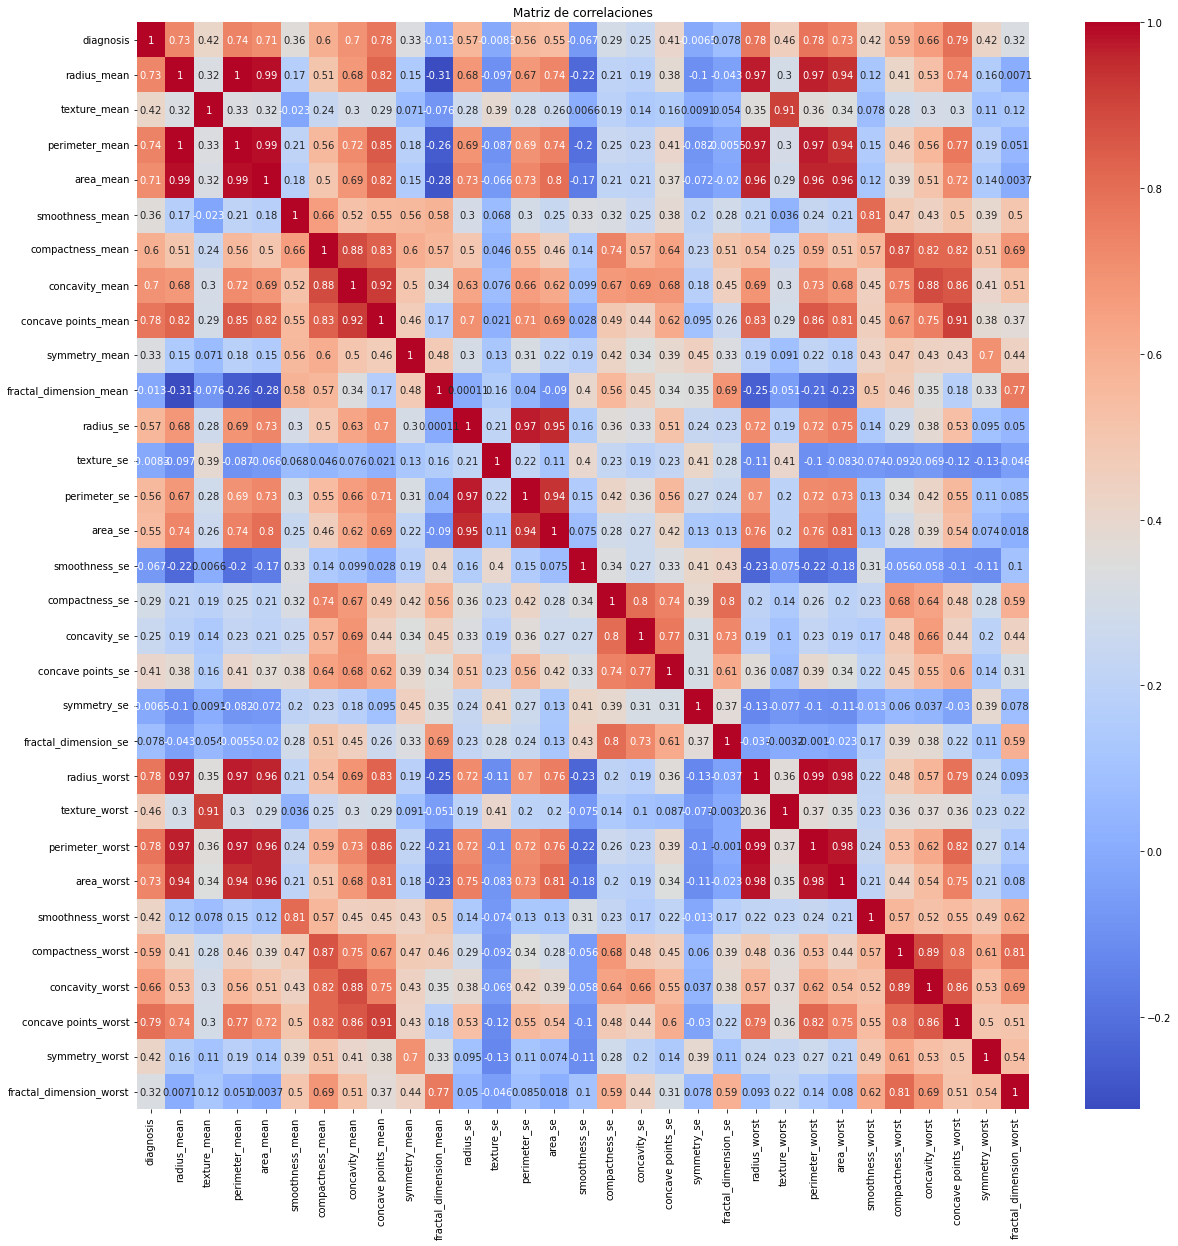

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

In [8]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [9]:
pca = PCA()
pca.fit(scaled_data)

PCA()

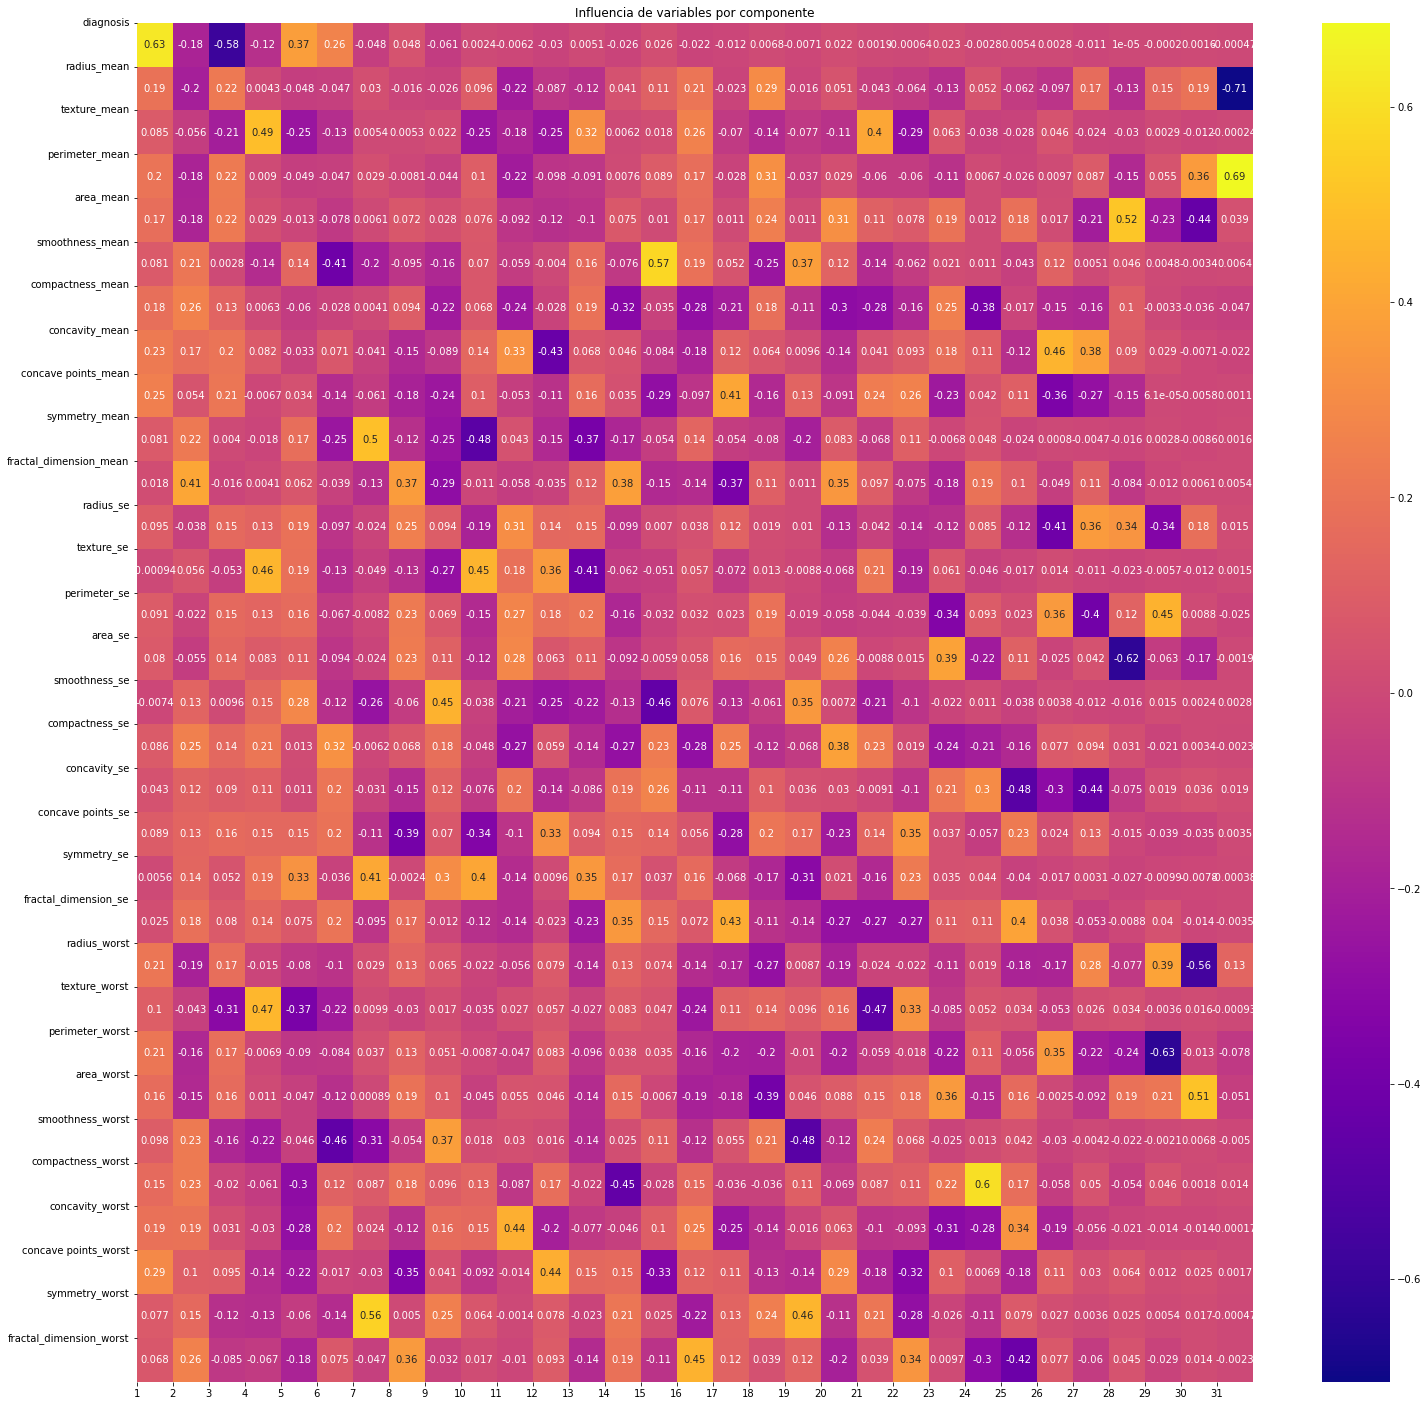

In [10]:
pca_score = pd.DataFrame(data = pca.components_, columns = data.columns)
fig = plt.figure(figsize=(25,25))
sns.heatmap(pca_score.transpose(), annot = True, cmap='plasma')
plt.title("Influencia de variables por componente")
plt.yticks(range(len(data.columns)),data.columns)
plt.xticks(range(len(data.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.show()

In [11]:
#matrix_transform = pca.components_.T

#fig = plt.figure(figsize=(16,6))
#for _ in range(len(matrix_transform)):
#    plt.subplot(4,4,_+1)
#    plt.bar(np.arange(len(matrix_transform)),matrix_transform[:,_])
#    plt.title(f'Componente {_+1}')
#    plt.xlabel('Num variable real')
#    plt.ylabel('Vector asociado')
#    plt.plot()
#fig.tight_layout(pad=1)
#plt.show()

In [12]:
loading_scores = pd.DataFrame(pca.components_[0]) 
loading_scores.index = data.columns
sorted_loading_scores = loading_scores[0].abs().sort_values(ascending=False)
top3_1 = sorted_loading_scores[0:3].index.values

loading_scores2 = pd.DataFrame(pca.components_[1]) 
loading_scores2.index = data.columns
sorted_loading_scores2 = loading_scores2[0].abs().sort_values(ascending=False)
top2_2 = sorted_loading_scores2[0:2].index.values


print(top3_1)
print(top2_2)


['diagnosis' 'concave points_worst' 'concave points_mean']
['fractal_dimension_mean' 'fractal_dimension_worst']


In [13]:
data_PCA = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
print('Varianza explicada: ',per_var)
porcent_acum = np.cumsum(per_var)
print('Acumulado: ',porcent_acum)

Varianza explicada:  [60.  13.   6.8  5.   3.9  2.7  2.2  1.1  0.8  0.7  0.7  0.6  0.6  0.5
  0.3  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.
  0.   0.   0. ]
Acumulado:  [60.  73.  79.8 84.8 88.7 91.4 93.6 94.7 95.5 96.2 96.9 97.5 98.1 98.6
 98.9 99.1 99.3 99.4 99.5 99.6 99.7 99.8 99.9 99.9 99.9 99.9 99.9 99.9
 99.9 99.9 99.9]


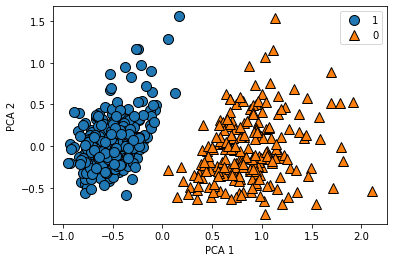

In [14]:
mglearn.discrete_scatter(data_PCA[:,0], data_PCA[:,1], data['diagnosis'])
plt.legend(data['diagnosis'].unique(), loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [15]:
diagnosis = data.diagnosis
data.drop(["diagnosis"], axis = 1, inplace = True)
diagnosis

0      1
1      0
2      1
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: diagnosis, Length: 569, dtype: int64

### Again, but without the Y

In [16]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [17]:
pca = PCA()
pca.fit(scaled_data)

PCA()

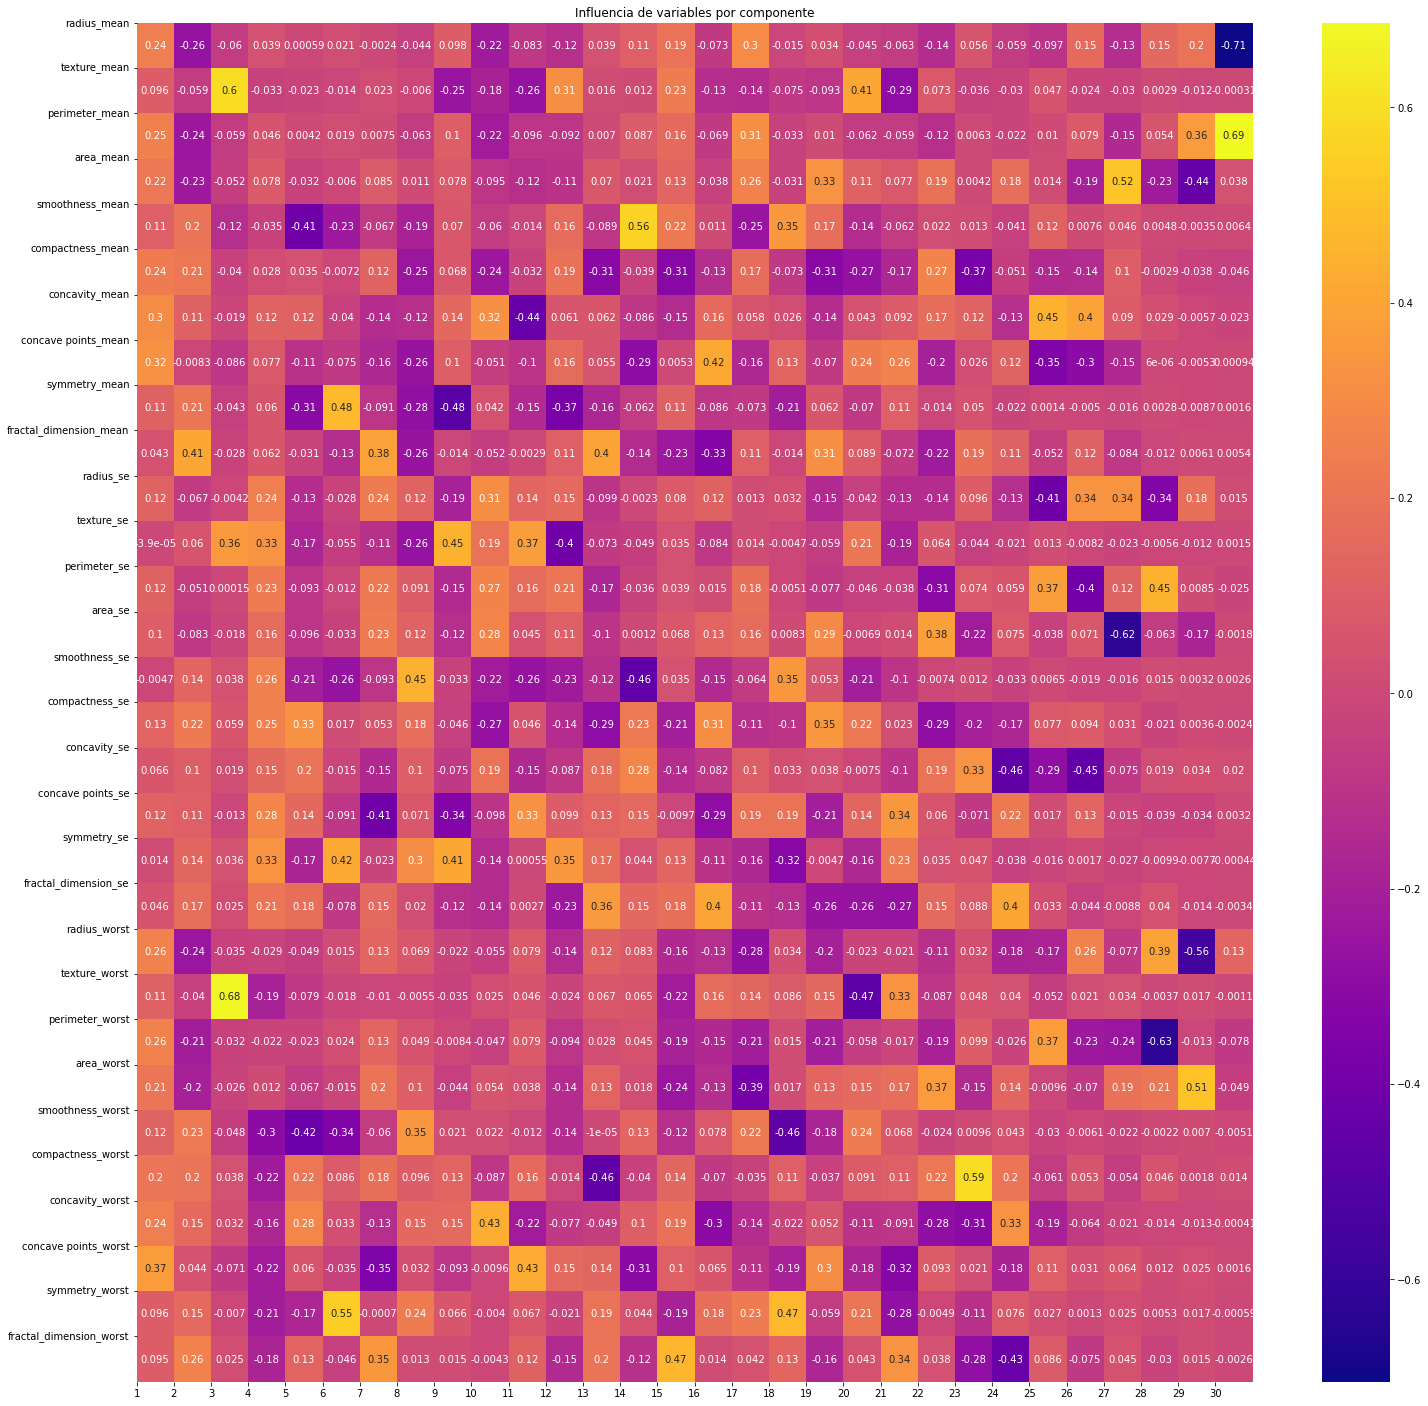

In [18]:
pca_score = pd.DataFrame(data = pca.components_, columns = data.columns)

fig = plt.figure(figsize=(25,25))
sns.heatmap(pca_score.transpose(), annot = True, cmap='plasma')
plt.title("Influencia de variables por componente")
plt.yticks(range(len(data.columns)),data.columns)
plt.xticks(range(len(data.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.show()

In [19]:
#matrix_transform = pca.components_.T

#fig = plt.figure(figsize=(16,6))
#for _ in range(len(matrix_transform)):
#    plt.subplot(4,4,_+1)
#    plt.bar(np.arange(len(matrix_transform)),matrix_transform[:,_])
#    plt.title(f'Componente {_+1}')
#    plt.xlabel('Num variable real')
#    plt.ylabel('Vector asociado')
#    plt.plot()
#fig.tight_layout(pad=1)
#plt.show()

In [20]:
loading_scores = pd.DataFrame(pca.components_[0]) 
loading_scores.index = data.columns
sorted_loading_scores = loading_scores[0].abs().sort_values(ascending=False)
top3_1 = sorted_loading_scores[0:3].index.values

loading_scores2 = pd.DataFrame(pca.components_[1]) 
loading_scores2.index = data.columns
sorted_loading_scores2 = loading_scores2[0].abs().sort_values(ascending=False)
top2_2 = sorted_loading_scores2[0:2].index.values


print(top3_1)
print(top2_2)

['concave points_worst' 'concave points_mean' 'concavity_mean']
['fractal_dimension_mean' 'radius_mean']


In [21]:
data_PCA = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
print('Varianza explicada: ',per_var)
porcent_acum = np.cumsum(per_var)
print('Acumulado: ',porcent_acum)

Varianza explicada:  [53.1 17.3  7.1  6.4  4.1  3.1  1.6  1.2  1.   0.9  0.8  0.8  0.7  0.5
  0.3  0.3  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.
  0.   0. ]
Acumulado:  [ 53.1  70.4  77.5  83.9  88.   91.1  92.7  93.9  94.9  95.8  96.6  97.4
  98.1  98.6  98.9  99.2  99.4  99.6  99.7  99.8  99.9 100.  100.1 100.2
 100.2 100.2 100.2 100.2 100.2 100.2]


In [22]:
data_PCA = pd.DataFrame(data_PCA)
data_PCA = data_PCA.iloc[:,0:10]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data_PCA, diagnosis, test_size=0.3, random_state=42)

In [24]:
X_all = sm.add_constant(X_train)
reg_logit = sm.Logit(y_train,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()


Optimization terminated successfully.
         Current function value: 0.055951
         Iterations 12


C:\Users\juanm\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.917     
Dependent Variable: diagnosis        AIC:              66.5372   
Date:               2022-02-17 10:20 BIC:              110.3882  
No. Observations:   398              Log-Likelihood:   -22.269   
Df Model:           10               LL-Null:          -268.95   
Df Residuals:       387              LLR p-value:      1.1528e-99
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-------------------------------------------------------------------
         Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const     0.5600     0.6926    0.8086   0.4187    -0.7974    1.9175
0        25.4023     5.3874    4.7152   0.0000    14.8432   35.9613
1       -10.6858     2.4884   -4.2942   0.0000   -15.5631   -5.8086
2         5.9477     2.2470    2.6470   0.0081     1.5437   10.3517
3        -7.1122     3.4620   -2.0543   0.0399   -13.8976   -0.3267
4       -17.5420     5.1869   -3.3820   0.0007   -27.7080   -7.3759
5        -0.0089     2.9584   -0.0030   0.9976    -5.8072    5.7894
6        16.0044     7.5603    2.1169   0.0343     1.1866   30.8222
7         5.5614     6.0603    0.9177   0.3588    -6.3165   17.4393
8        -7.2655     6.9128   -1.0510   0.2932   -20.8145    6.2834
9        38.8395    11.4374    3.3958   0.0007    16.4225   61.2565
=================================================================

"""

In [25]:
params = [results_logit.params]
params = pd.DataFrame(params)
params['const']#.iloc[0]

0    0.560027
Name: const, dtype: float64

In [26]:
proc = [] 
for i in range(len(y_test)):
    result = 0
    for j in range(len(params)):
        result += params[j+1]*X_test.iloc[i,j]
    proc.append(result)
    
proc2 = [x + params['const'] for x in proc]
#print(type(proc2))
np.shape(proc2)
#proc2

(171, 1)

In [27]:
proc3 = []
for i in range(len(proc)):
    result = 1/(1+np.exp(-proc2[i]))
    proc3.append(result)
#np.min(proc3)
proc3 = pd.DataFrame(proc3)
print(proc3)

            0
0    0.998818
1    0.981869
2    0.464182
3    0.994000
4    0.597719
..        ...
166  0.999245
167  0.003936
168  0.101785
169  0.999416
170  0.949523

[171 rows x 1 columns]


In [28]:
#prediction = []
#for i in range(0, int(len(proc3))):
    #print(i)
#    if proc3.iloc[i,0] >= 0.5:
#        prediction.append(1)
#    if proc3.iloc[i,0] <0.5:
#        prediction.append(0)
#print(prediction)


In [29]:
proc4 = [0.5>=proc3] 
#prediction = []

prediction = [0 if proc3.iloc[i,0] >= 0.5 else 1 for i in range(len(proc))]
#prediction.type
#proc4.type
#prediction = proc4 
#prediction
dictionary = {'Numerico': prediction, 'Bool': proc4}
#comparativa = pd.DataFrame(dictionary)
print(len(prediction), len(proc4))
#proc4#[0]

171 1


In [30]:
#y_hat = results_logit.predict(X_test)


In [31]:
prediction

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0]

In [32]:
proc4

[         0
 0    False
 1    False
 2     True
 3    False
 4    False
 ..     ...
 166  False
 167   True
 168   True
 169  False
 170  False
 
 [171 rows x 1 columns]]

# Confusion Matrix

In [33]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[115   6]
 [  4  46]]


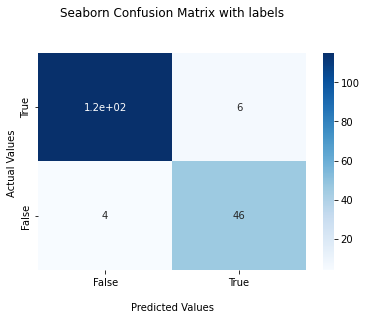

In [34]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Accuracy Score

In [35]:
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.9415204678362573


# PresicionScore

In [36]:
print('Test precision = ', precision_score(y_test, prediction))


Test precision =  0.8846153846153846


# Presicion Score

In [37]:
print('Test recall = ', recall_score(y_test, prediction))

Test recall =  0.92


# Now, we do a linear gression without PCA

In [38]:
data = pd.read_csv(r"breast-cancer.csv")
data['diagnosis'] = data['diagnosis'].replace(['M', 'B'], [1,0])
data = data.sample(frac = 1)
data = data.reset_index(drop=True) # We need so the regression can work
data.drop(["id"], axis = 1, inplace = True)
diagnosis = data.diagnosis
data.drop(["diagnosis"], axis = 1, inplace = True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    data_PCA, diagnosis, test_size=0.3, random_state=42)

In [40]:
X_all = sm.add_constant(X_train)
reg_logit = sm.Logit(y_train,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.654818
         Iterations 5


C:\Users\juanm\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.022   
Dependent Variable: diagnosis        AIC:              543.2354
Date:               2022-02-17 10:20 BIC:              587.0864
No. Observations:   398              Log-Likelihood:   -260.62 
Df Model:           10               LL-Null:          -266.51 
Df Residuals:       387              LLR p-value:      0.30009 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const   -0.4604     0.1050   -4.3842   0.0000   -0.6663   -0.2546
0       -0.0273     0.1783   -0.1534   0.8781   -0.3767    0.3221
1        0.7066     0.3122    2.2635   0.0236    0.0948    1.3185
2        0.2725     0.5228    0.5213   0.6022   -0.7521    1.2972
3        0.0885     0.5023    0.1762   0.8601   -0.8960    1.0730
4       -0.5636     0.6372   -0.8846   0.3764   -1.8125    0.6852
5       -0.3149     0.7645   -0.4119   0.6804   -1.8132    1.1835
6        1.9982     1.0893    1.8344   0.0666   -0.1368    4.1332
7       -0.6222     1.2499   -0.4978   0.6186   -3.0719    1.8275
8       -1.1804     1.4424   -0.8184   0.4131   -4.0074    1.6466
9        1.4033     1.4015    1.0013   0.3167   -1.3436    4.1503
===============================================================

"""

In [41]:
params = [results_logit.params]
params = pd.DataFrame(params)
params['const']#.iloc[0]

0   -0.460438
Name: const, dtype: float64

In [42]:
proc = [] 
for i in range(len(y_test)):
    result = 0
    for j in range(len(params)):
        result += params[j+1]*X_test.iloc[i,j]
    proc.append(result)
    


In [43]:
proc2 = [x + params['const'] for x in proc]
#print(type(proc2))
np.shape(proc2)
#proc2

(171, 1)

In [44]:
proc3 = []
for i in range(len(proc)):
    result = 1/(1+np.exp(-proc2[i]))
    proc3.append(result)
#np.min(proc3)
proc3 = pd.DataFrame(proc3)
print(proc3)

            0
0    0.295451
1    0.334616
2    0.397974
3    0.318360
4    0.389459
..        ...
166  0.289313
167  0.485640
168  0.430600
169  0.285824
170  0.350360

[171 rows x 1 columns]


In [45]:
proc4 = [0.5>=proc3] 
#prediction = []

prediction = [0 if proc3.iloc[i,0] >= 0.5 else 1 for i in range(len(proc))]
#prediction.type
#proc4.type
#prediction = proc4 
#prediction
dictionary = {'Numerico': prediction, 'Bool': proc4}
#comparativa = pd.DataFrame(dictionary)
print(len(prediction), len(proc4))
#proc4#[0]

171 1


In [46]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[16 99]
 [ 6 50]]


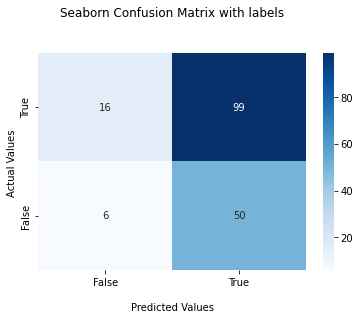

In [47]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Accuracy

In [48]:
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.38596491228070173


# Presicion

In [49]:
print('Test precision = ', precision_score(y_test, prediction))


Test precision =  0.33557046979865773


# Recall

In [50]:
print('Test recall = ', recall_score(y_test, prediction))

Test recall =  0.8928571428571429
